Data Preparation

In [ ]:
import pandas as pd

df= pd.read_csv('/content/voice.csv')
df.drop(['modindx','dfrange','maxdom','mindom','meandom','maxfun'],axis=1, inplace=True)


#Binarizer
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['label']:
    df[col]=lb.fit_transform(df[col])
df.head()

In [ ]:
#Setting Features and Labels
x_cols = [x for x in df.columns if x != 'label']

X_data = df[x_cols]
y_data = df['label']

#KNN Predict
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
def accuracy(real,predict):
    return sum(y_data==y_pred)/float(real.shape[0])
print(accuracy(y_data,y_pred))

0.915719696969697


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


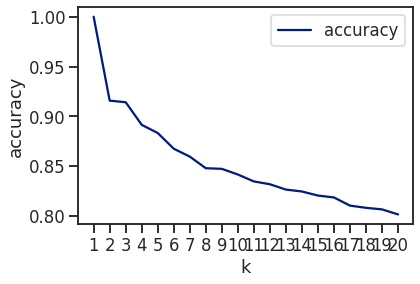

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

score_list = list()

for k in range(1, 21):
    knn =  KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    score_list.append((k,score))
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

In [ ]:
#Save Model
from sklearn.externals import joblib
joblib.dump(knn, 'VoiceRecognitionKNN.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['VoiceRecognitionKNN.pkl']

In [ ]:
#Load Model
LoadModel = joblib.load('/content/VoiceRecognitionKNN.pkl' , mmap_mode ='r')
modelPred=LoadModel.predict(X_data)


In [ ]:
#Load Model Metrics
def accuracy(real,predict):
    return sum(y_data==modelPred)/float(real.shape[0])
print(accuracy(y_data,modelPred))

0.915719696969697
